In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
#Refrence to Csv files 
cab_ride=pd.read_csv("Cab-Weather-Data/cab_rides.csv")
weather = pd.read_csv("Cab-Weather-Data/weather.csv")
 

In [4]:
#changed the data type of the time_stamp 
cab_ride["date"] = pd.to_datetime(cab_ride["time_stamp"] / 1000, unit='s')
cab_ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [5]:
#changed the data type of the time_stamp 
weather["date"] = pd.to_datetime(weather["time_stamp"] , unit='s')
weather.sort_values("date").head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
2512,40.84,West End,0.87,1014.40,NaN,1543203644,0.93,1.52,2018-11-26 03:40:44
2509,40.98,Haymarket Square,0.87,1014.40,NaN,1543203644,0.92,1.57,2018-11-26 03:40:44
2511,40.86,South Station,0.87,1014.39,NaN,1543203644,0.93,1.60,2018-11-26 03:40:44
2510,40.81,Northeastern University,0.89,1014.35,NaN,1543203644,0.93,1.36,2018-11-26 03:40:44
3998,41.04,Back Bay,0.87,1014.39,NaN,1543203645,0.92,1.46,2018-11-26 03:40:45


In [6]:
#Check datatypes check for each dataset
#cab_ride.dtypes
#weather.dtypes


#Merge the datesets into a single one based on time_stamp and location
merged_data = pd.merge_asof(cab_ride.sort_values("date"), weather.sort_values("date"), 
                            left_by=  ['source' ],right_by= ['location' ] ,
                            left_on=  ['date']   ,right_on= ['date'] )
merged_data.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,date,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind
0,3.03,Lyft,1543203646318,Theatre District,Boston University,34.0,1.0,ef4771c2-c88d-4730-aaf7-a95751e9d27e,lyft_luxsuv,Lux Black XL,2018-11-26 03:40:46.318000128,41.07,Boston University,0.86,1014.39,NaN,1543203645,0.92,1.36
1,1.57,Uber,1543203646319,North End,Theatre District,NaN,1.0,9962f244-8fce-4ae9-a583-139d5d7522e1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-26 03:40:46.319000064,40.80,Theatre District,0.87,1014.39,NaN,1543203645,0.93,1.55
2,1.30,Uber,1543203646319,Theatre District,South Station,18.5,1.0,00ea74ea-2c49-416c-bfc5-f7877025f6eb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-26 03:40:46.319000064,40.86,South Station,0.87,1014.39,NaN,1543203644,0.93,1.60
3,2.71,Uber,1543203646320,Fenway,Theatre District,19.5,1.0,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-11-26 03:40:46.320000000,40.80,Theatre District,0.87,1014.39,NaN,1543203645,0.93,1.55
4,2.43,Lyft,1543203646320,Beacon Hill,Northeastern University,10.5,1.0,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,lyft,Lyft,2018-11-26 03:40:46.320000000,40.81,Northeastern University,0.89,1014.35,NaN,1543203644,0.93,1.36


In [7]:
cab_ride.shape


(693071, 11)

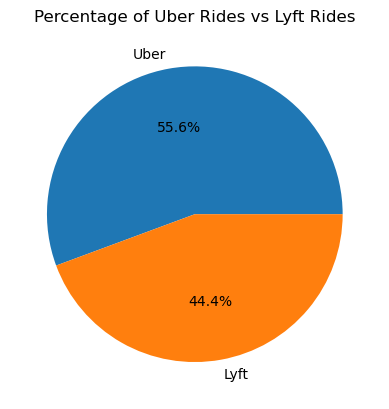

In [8]:
#Pie chart created to see the percentage of lyft rides to Uber Rides

ride_counts = merged_data["cab_type"].value_counts()

percentages = (ride_counts / ride_counts.sum()) * 100

plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Uber Rides vs Lyft Rides') 
plt.show()

In [9]:
#find the min and max distance of the trips to find the ranges 

maximum_distance = merged_data["distance"].max()
minimum_distance = merged_data["distance"].min()

print("Maximum Distance:", maximum_distance)
print("Minimum Distance:", minimum_distance)

Maximum Distance: 7.86
Minimum Distance: 0.02


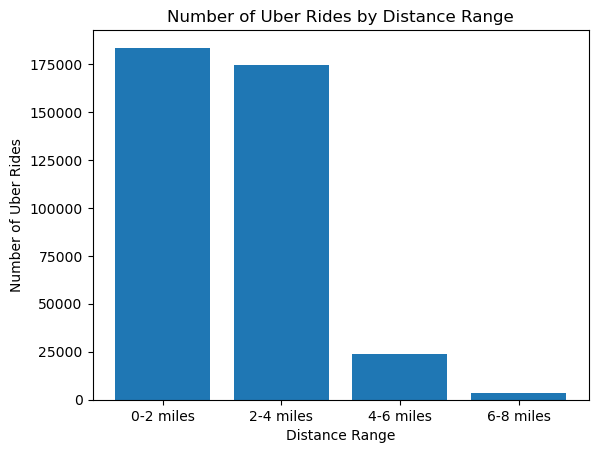

In [10]:
# Filter the DataFrame to include only Uber rides
uber_rides = merged_data[merged_data["cab_type"] == "Uber"]

# Define the distance ranges
distance_ranges = ["0-2 miles", "2-4 miles", "4-6 miles", "6-8 miles"]

# Count the number of Uber rides within each distance range
ride_counts = [
    ((uber_rides["distance"] >= 0) & (uber_rides["distance"] <= 2)).sum(),
    ((uber_rides["distance"] > 2) & (uber_rides["distance"] <= 4)).sum(),
    ((uber_rides["distance"] > 4) & (uber_rides["distance"] <= 6)).sum(),
    ((uber_rides["distance"] > 6) & (uber_rides["distance"] <= 8)).sum()
]

# Plot the bar graph
plt.bar(distance_ranges, ride_counts)
plt.xlabel("Distance Range")
plt.ylabel("Number of Uber Rides")
plt.title("Number of Uber Rides by Distance Range")
plt.show()

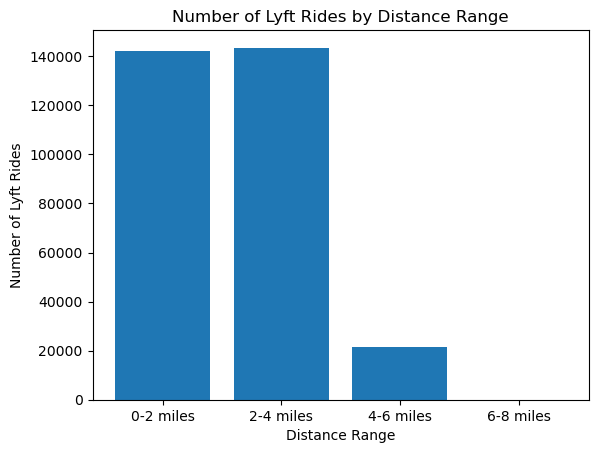

In [13]:
# Filter the DataFrame to include only Uber rides
lyft_rides = merged_data[merged_data["cab_type"] == "Lyft"]

# Define the distance ranges
distance_ranges = ["0-2 miles", "2-4 miles", "4-6 miles", "6-8 miles"]

# Count the number of Uber rides within each distance range
ride_counts = [
    ((lyft_rides["distance"] >= 0) & (lyft_rides["distance"] <= 2)).sum(),
    ((lyft_rides["distance"] > 2) & (lyft_rides["distance"] <= 4)).sum(),
    ((lyft_rides["distance"] > 4) & (lyft_rides["distance"] <= 6)).sum(),
    ((lyft_rides["distance"] > 6) & (lyft_rides["distance"] <= 8)).sum()
]

# Plot the bar graph
plt.bar(distance_ranges, ride_counts)
plt.xlabel("Distance Range")
plt.ylabel("Number of Lyft Rides")
plt.title("Number of Lyft Rides by Distance Range")
plt.show()